# Ensembler

In [1]:
import os, sys
path = os.getcwd()+"/.."
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!
print(os.getcwd())

/home/bschroed/code/Ensembler/examples


## Import

In [2]:
import Ensembler
#import Ensembler.visualisation.plotPotentials as vis

/home/bschroed/code/Ensembler


## Basic Definitions

In [4]:
#Potential:
potential = Ensembler.potentials.OneD.harmonicOsc()
#Integrator
integrator = Ensembler.integrator.positionVerletIntegrator() #metropolisMonteCarloIntegrator()
#System
system = Ensembler.system.system(integrator=integrator, potential=potential)

#exchange dimension:
exchange_dimension = {"temperature": range(298, 350, 20)}

## Build Ensbemle

In [5]:
ensemble = Ensembler.ensemble.replica_exchange.TemperatureReplicaExchange(system=system)

In [6]:
ensemble

In [7]:
ensemble.replicas

{0: <ensembler.system.basic_system.system at 0x7fa2f3dc5e48>,
 1: <ensembler.system.basic_system.system at 0x7fa2f3dc5fd0>,
 2: <ensembler.system.basic_system.system at 0x7fa2f3b960b8>}

# Simulate

In [16]:
ensemble.simulate(25, reset_ensemble=True)

In [17]:
ensemble.exchange_information

,nExchange,uniqueReplicaID,replicaI,exchangeCoordinateI,TotEI,replicaJ,exchangeCoordinateJ,TotEJ,doExchange
0,1,1,0,0,[4061.4649552103547],1,1,[93.19607820991119],[True]
1,1,0,1,1,[0.6735311370867475],0,0,[inf],[True]
2,1,2,2,2,[3943.443051863139],2,2,[3943.443051863139],False
3,2,1,0,0,[37.08763109208008],0,0,[37.08763109208008],False
4,2,2,1,1,[70.81558916318315],2,2,[4048.935855146588],[True]
5,2,0,2,2,[1041.0623393597862],1,1,[281.21056109947],[True]
6,3,2,0,0,[3893.3030421227736],1,1,[72.4831949028604],[True]
7,3,1,1,1,[0.6831012464234703],0,0,[inf],[True]
8,3,0,2,2,[4040.3708816487015],2,2,[4040.3708816487015],False
9,4,2,0,0,[37.08763109208008],0,0,[37.08763109208008],False


# Visualisation

In [18]:
from reeds.function_libs.analysis import visualisation as vis

import matplotlib.pyplot as plt
%matplotlib inline

params ={"figure.facecolor": "w",
         "font.size": 14}
plt.rcParams.update(params)
import numpy as np


In [21]:
transition_dataFrame = ensemble.exchange_information
def generate_replica_traces(transition_dataFrame):
    transition_range = 0.25

    traces = {}
    max_x = 0
    max_y = 0
    for replica in sorted(set(transition_dataFrame.uniqueReplicaID)):
        tmp_frame = transition_dataFrame.loc[transition_dataFrame.uniqueReplicaID == replica].sort_values("nExchange")
        #print(tmp_frame)
        #trace = tmp_frame[["nExchange", "replicaI"]]
        x = list(tmp_frame.nExchange)
        y = list(tmp_frame.replicaI.apply(lambda x: list(ensemble.exchange_dimensions["temperature"])[x]))
        reversed_order_y = list(map(lambda x: -1 * x, y))  # block_order replicas inverse for nicer visualisation

        max_x = max(x) if(max(x)>max_x)else max_x
        max_y = max(y) if (max(y) > max_y) else max_y

        #  transition_trace
        trace = ([0, 1 - transition_range], [-1 * replica, -1 * replica])  # give initial_pos
        for ind, trial in enumerate(x):
            trace[0].append(trial - transition_range)
            trace[0].append(trial + transition_range)
            trace[1].append(trace[1][len(trace[1]) - 1])
            trace[1].append(reversed_order_y[ind])
        traces.update({replica: trace})
    return traces
traces = generate_replica_traces(transition_dataFrame=transition_dataFrame)

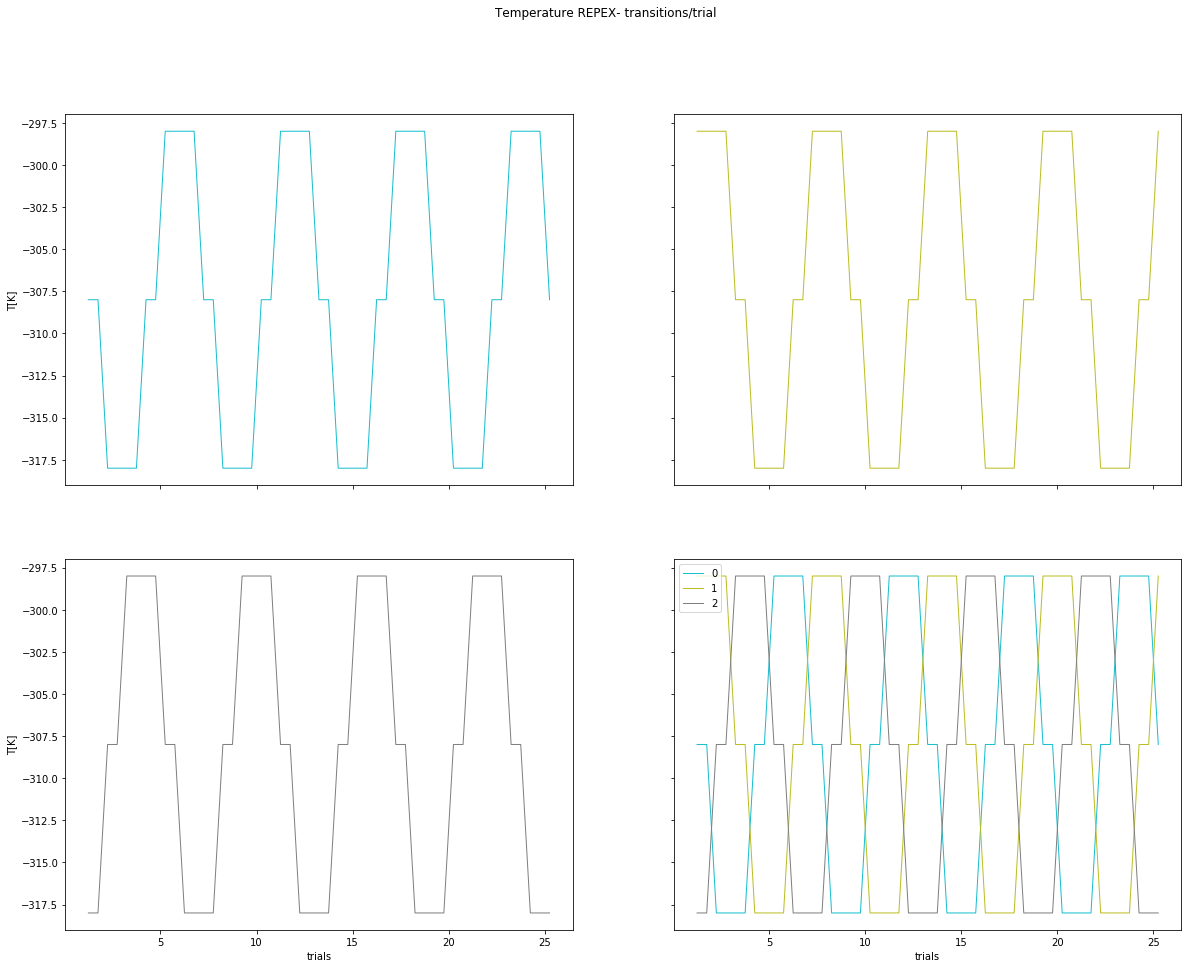

In [51]:

# todo: make visualisation function here 

out_path:str=None
title_prefix:str="test"
s_values=None
cut_1_replicas=False
xBond:tuple=None
equilibration_border:int=None
transparency=1
color_gradient_flag=True
show_repl_leg=False


#plotting
import matplotlib
matplotlib.use('Agg')
matplotlib.rcParams['agg.path.chunksize'] = 10000   #avoid chunksize error
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap

%matplotlib inline

num_replicas = traces.keys()

trace_color_dict = list(reversed(cm.get_cmap("tab10").colors))
repnum = len(traces)

if (cut_1_replicas and s_values):
    count_1 = s_values.count(1.0)  # filter 1 replicas@!
    yBond = (count_1-1, len(s_values))
    s_values = s_values[count_1-1:] if(count_1 != 0) else s_values

else:
    yBond = None

# general_Settings:
# init
ammount_of_x_labels = 5
ammount_of_y_labels = 21

starting_step = 3

# replica_trace options:
transition_range = 0.15
trace_width = 1

replica_traces = []
# prepare transition dict
traces, max_exch, max_y = traces, 10,20#max_x, max_y

#DO PLOTTING
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[20,15])
axes = axes.flat

for replica in num_replicas:
    trace = traces[replica]
    label = str(replica)
    replica_traces.append(axes[replica].plot(trace[0][starting_step:], trace[1][starting_step:], label=label, lw=trace_width, alpha=transparency, color=trace_color_dict[replica % repnum]))
    replica_traces.append(axes[len(num_replicas)].plot(trace[0][starting_step:], trace[1][starting_step:], label=label, lw=trace_width, alpha=transparency, color=trace_color_dict[replica % repnum]))
    
    if(replica == 0 or replica == 2):
        axes[replica].set_ylabel("T[K]")
    if(replica > 1):
        axes[replica].set_xlabel("trials")

axes[len(num_replicas)].set_xlabel("trials")

fig.suptitle("Temperature REPEX- transitions/trial")
plt.legend()
fig.show()


In [25]:
transition_dataFrame

,nExchange,uniqueReplicaID,replicaI,exchangeCoordinateI,TotEI,replicaJ,exchangeCoordinateJ,TotEJ,doExchange
0,1,1,0,0,[4061.4649552103547],1,1,[93.19607820991119],[True]
1,1,0,1,1,[0.6735311370867475],0,0,[inf],[True]
2,1,2,2,2,[3943.443051863139],2,2,[3943.443051863139],False
3,2,1,0,0,[37.08763109208008],0,0,[37.08763109208008],False
4,2,2,1,1,[70.81558916318315],2,2,[4048.935855146588],[True]
5,2,0,2,2,[1041.0623393597862],1,1,[281.21056109947],[True]
6,3,2,0,0,[3893.3030421227736],1,1,[72.4831949028604],[True]
7,3,1,1,1,[0.6831012464234703],0,0,[inf],[True]
8,3,0,2,2,[4040.3708816487015],2,2,[4040.3708816487015],False
9,4,2,0,0,[37.08763109208008],0,0,[37.08763109208008],False
